> Jiahui Tang

**Spec**:

* Cluster: AWS Hadoop EMR cluster with 2/4/8 worker instances, with instances type m4.xlarge

* Kernal:
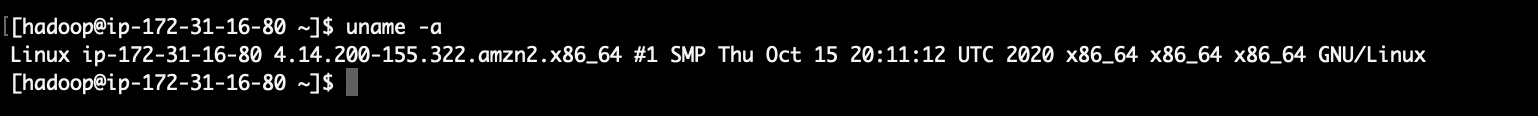

* Network:
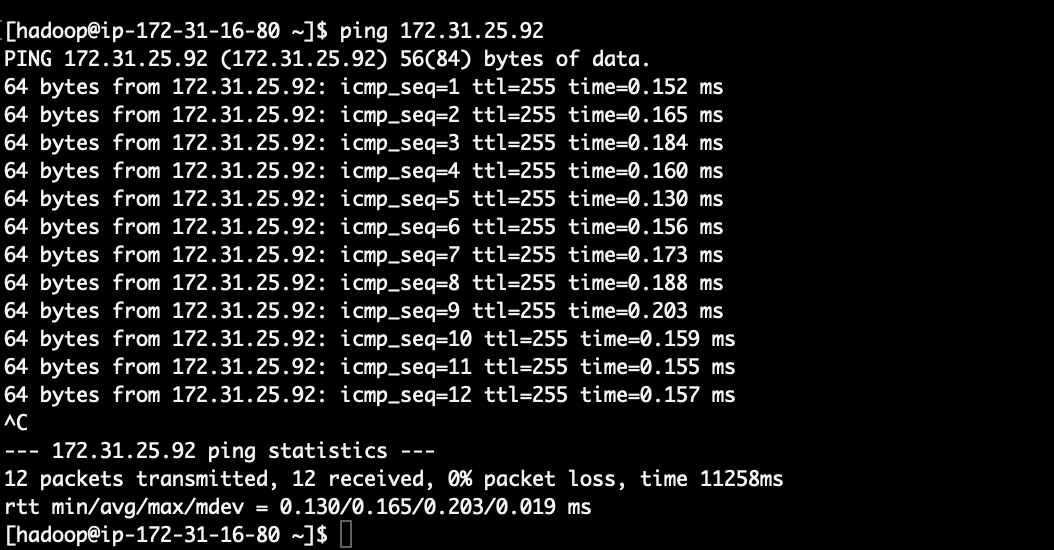

* Bandwidth: Amazon says it’s 5 Gbps

* Python Version:
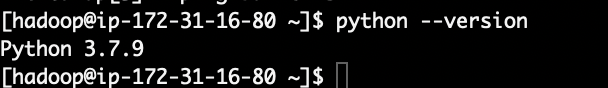

* CPU Info:
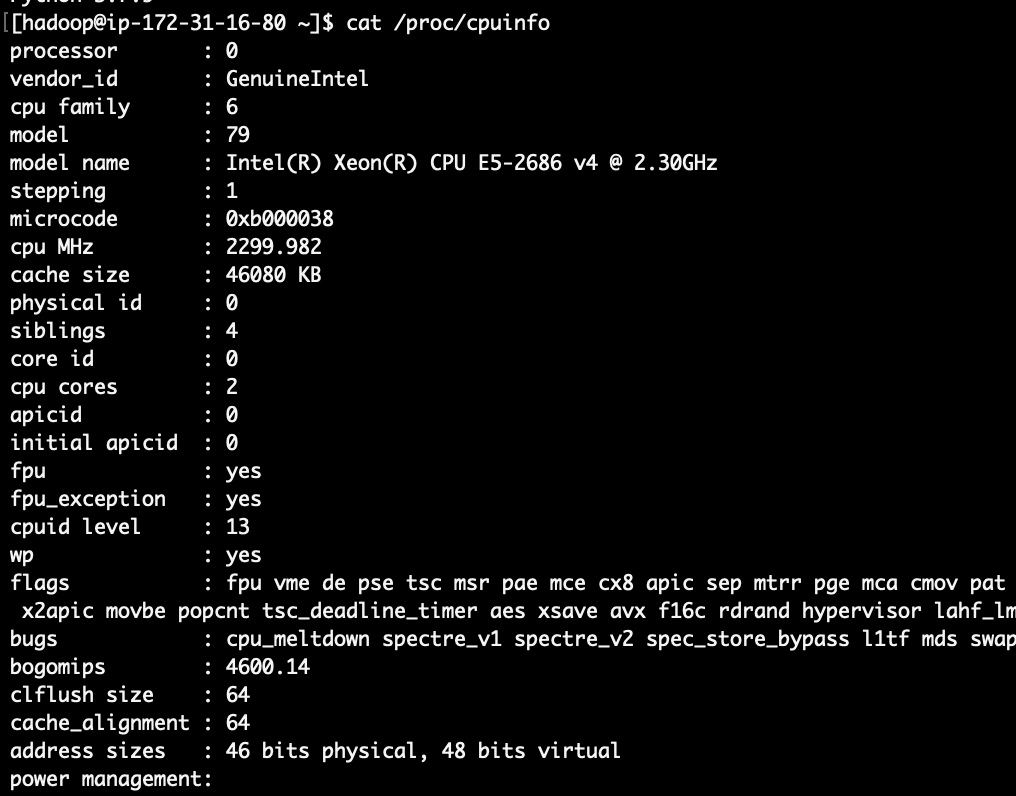
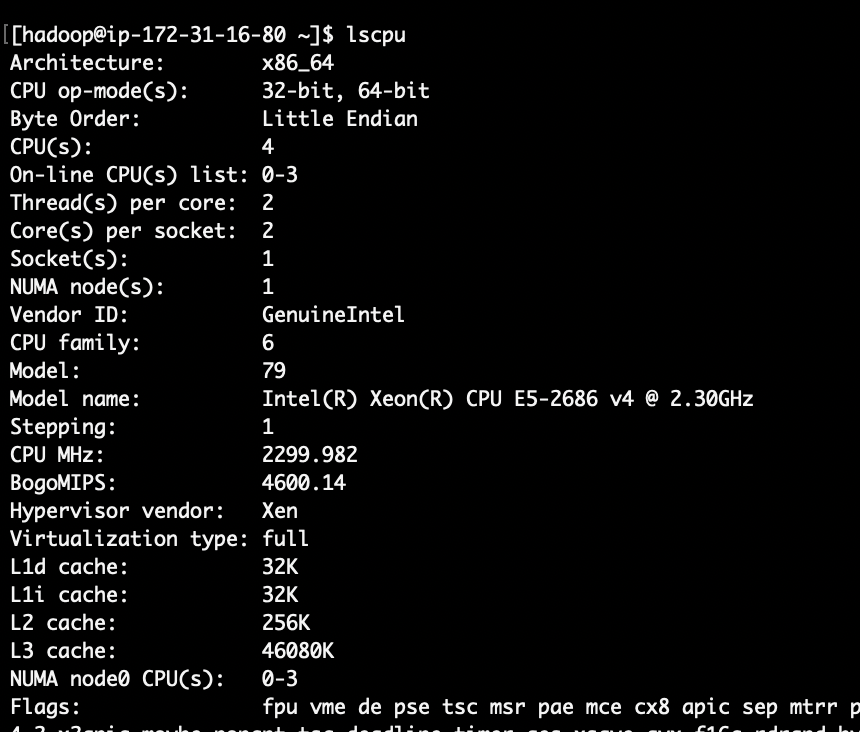

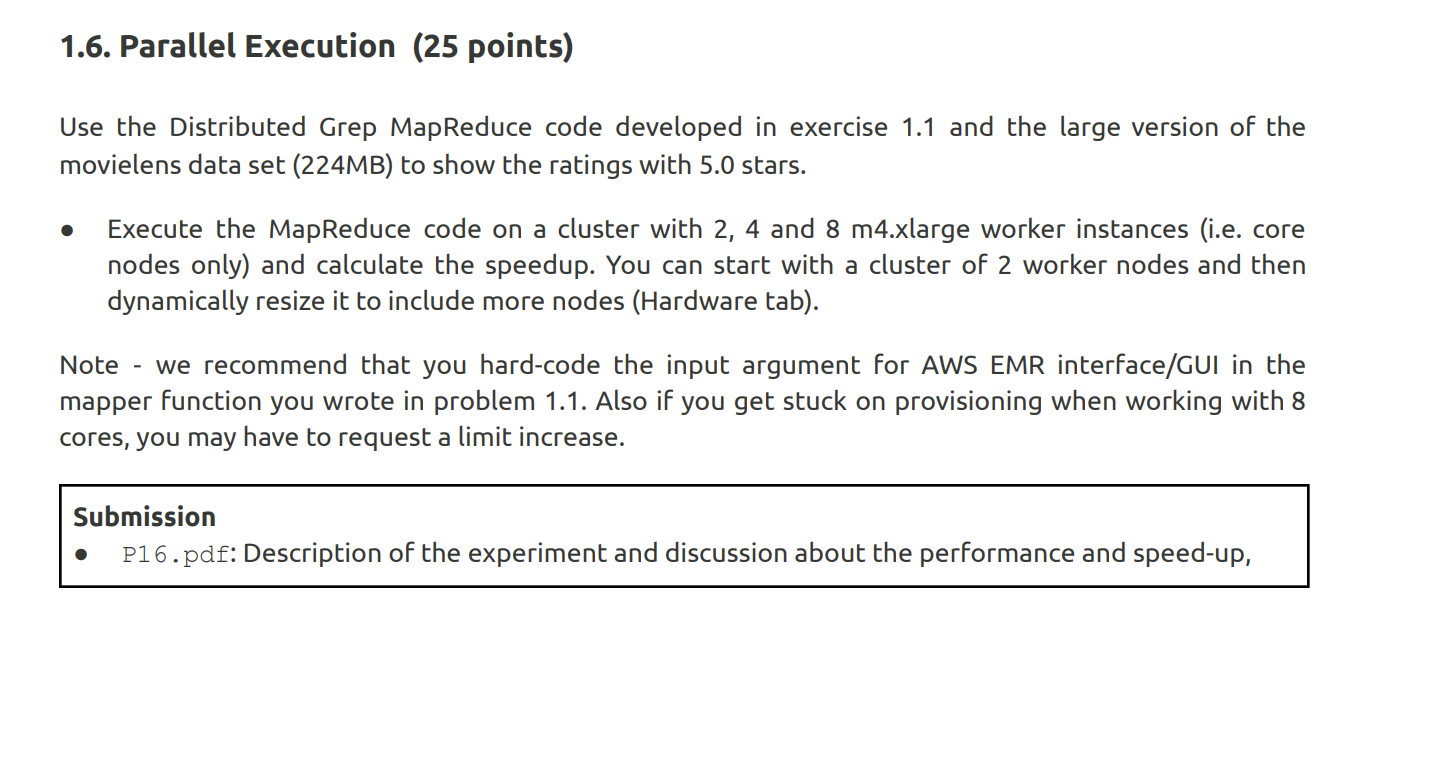

**Result**

| Workder Instances/Core Nodes      | Log Time | Speedup     |
| :---        |    :----:   |          ---: |
| 2 nodes      | 86 sec      | 1   |
| 4 nodes    | 66 sec        | 1.3030      |
| 8 nodes    | 52 sec        | 1.6538      |

**Discussion of Performance**

`grep` is a command-line utility for searching plain-text data sets for lines that match a regular expression. Its name comes from the ed command g/re/p (globally search for a regular expression and print matching lines), which has the same effect. 

From the result table, we could see that after we increase the node, the log time didn't decrease a lot, and speedup also only increase from `1` to `1.3` and `1.6`, for node increases from `2` to `4` and `8` respectively.

It is mainly because of `grep` has a I/O bound, rather than CPU bound (In CPU we only check for `5.0 in line`).

As the `EXECUTION_TIME = CPU_TIME + I/O_TIME + SYSTEM_TIME`, when we increase the node, we could decrease `CPU_TIME`, as it is being parallelized. However, as we are doing grep and search for the same pattern, the read and write data part takes a large amount of total execution time, which also keeps unchanged even when the nodes are increased. Thus, as `I/O_TIME` keeps unchanged, while provisioning and shuffle data into more nodes may take more time in Hadoop job, `SYSTEM_TIME` may also be increase, which shows overhead overall is proportional to the number of workers. The total speedup would thus be way less than theortical speed up when number of nodes increases.


**Steps/Experiment**

1. Start Hadoop EMR Cluster with 3 instances (1 master + 2 core nodes) 

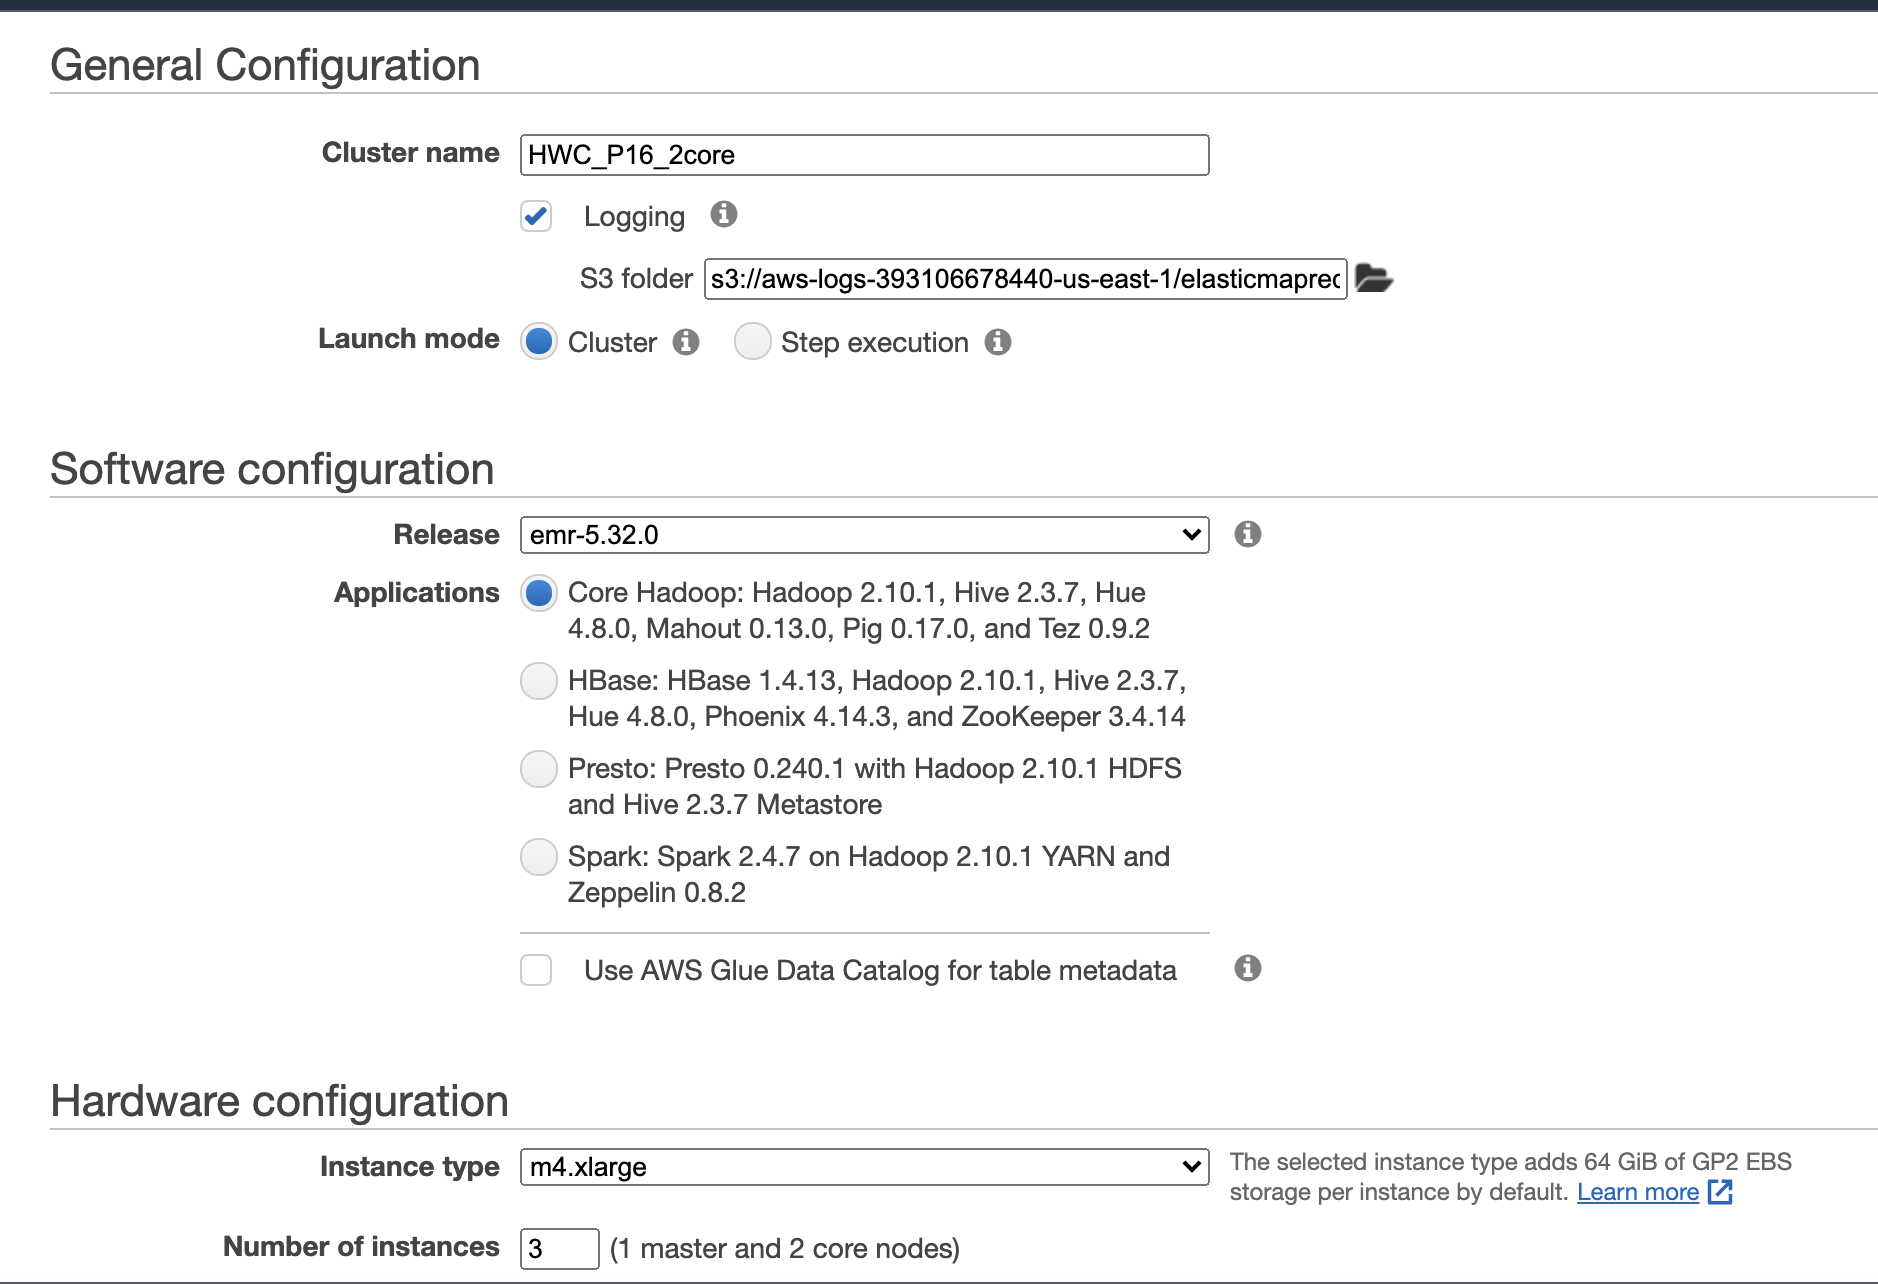

2. Uploading ratings.csv and mapper and reducer python files to S3 buckets (either use cmd line as below or GUI)
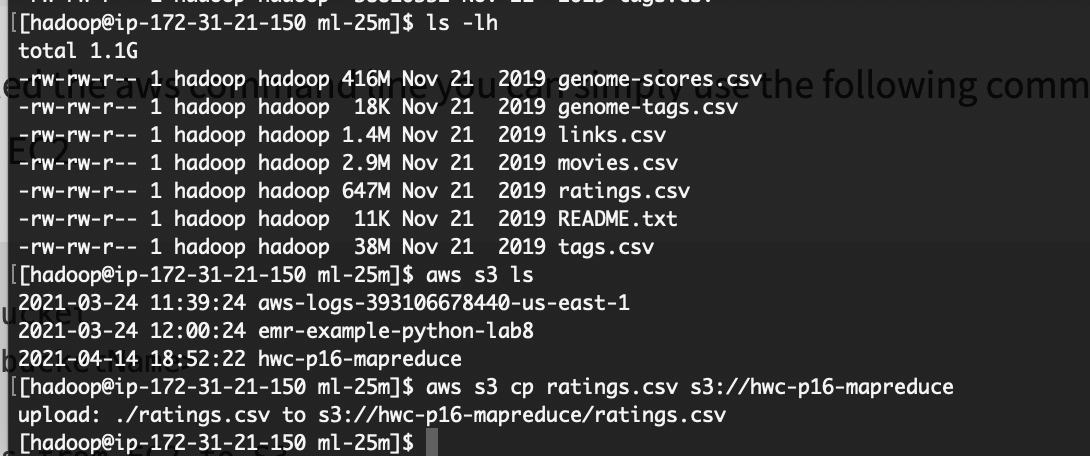

3. Uploaded files used for MapReduce Job in S3 bucket
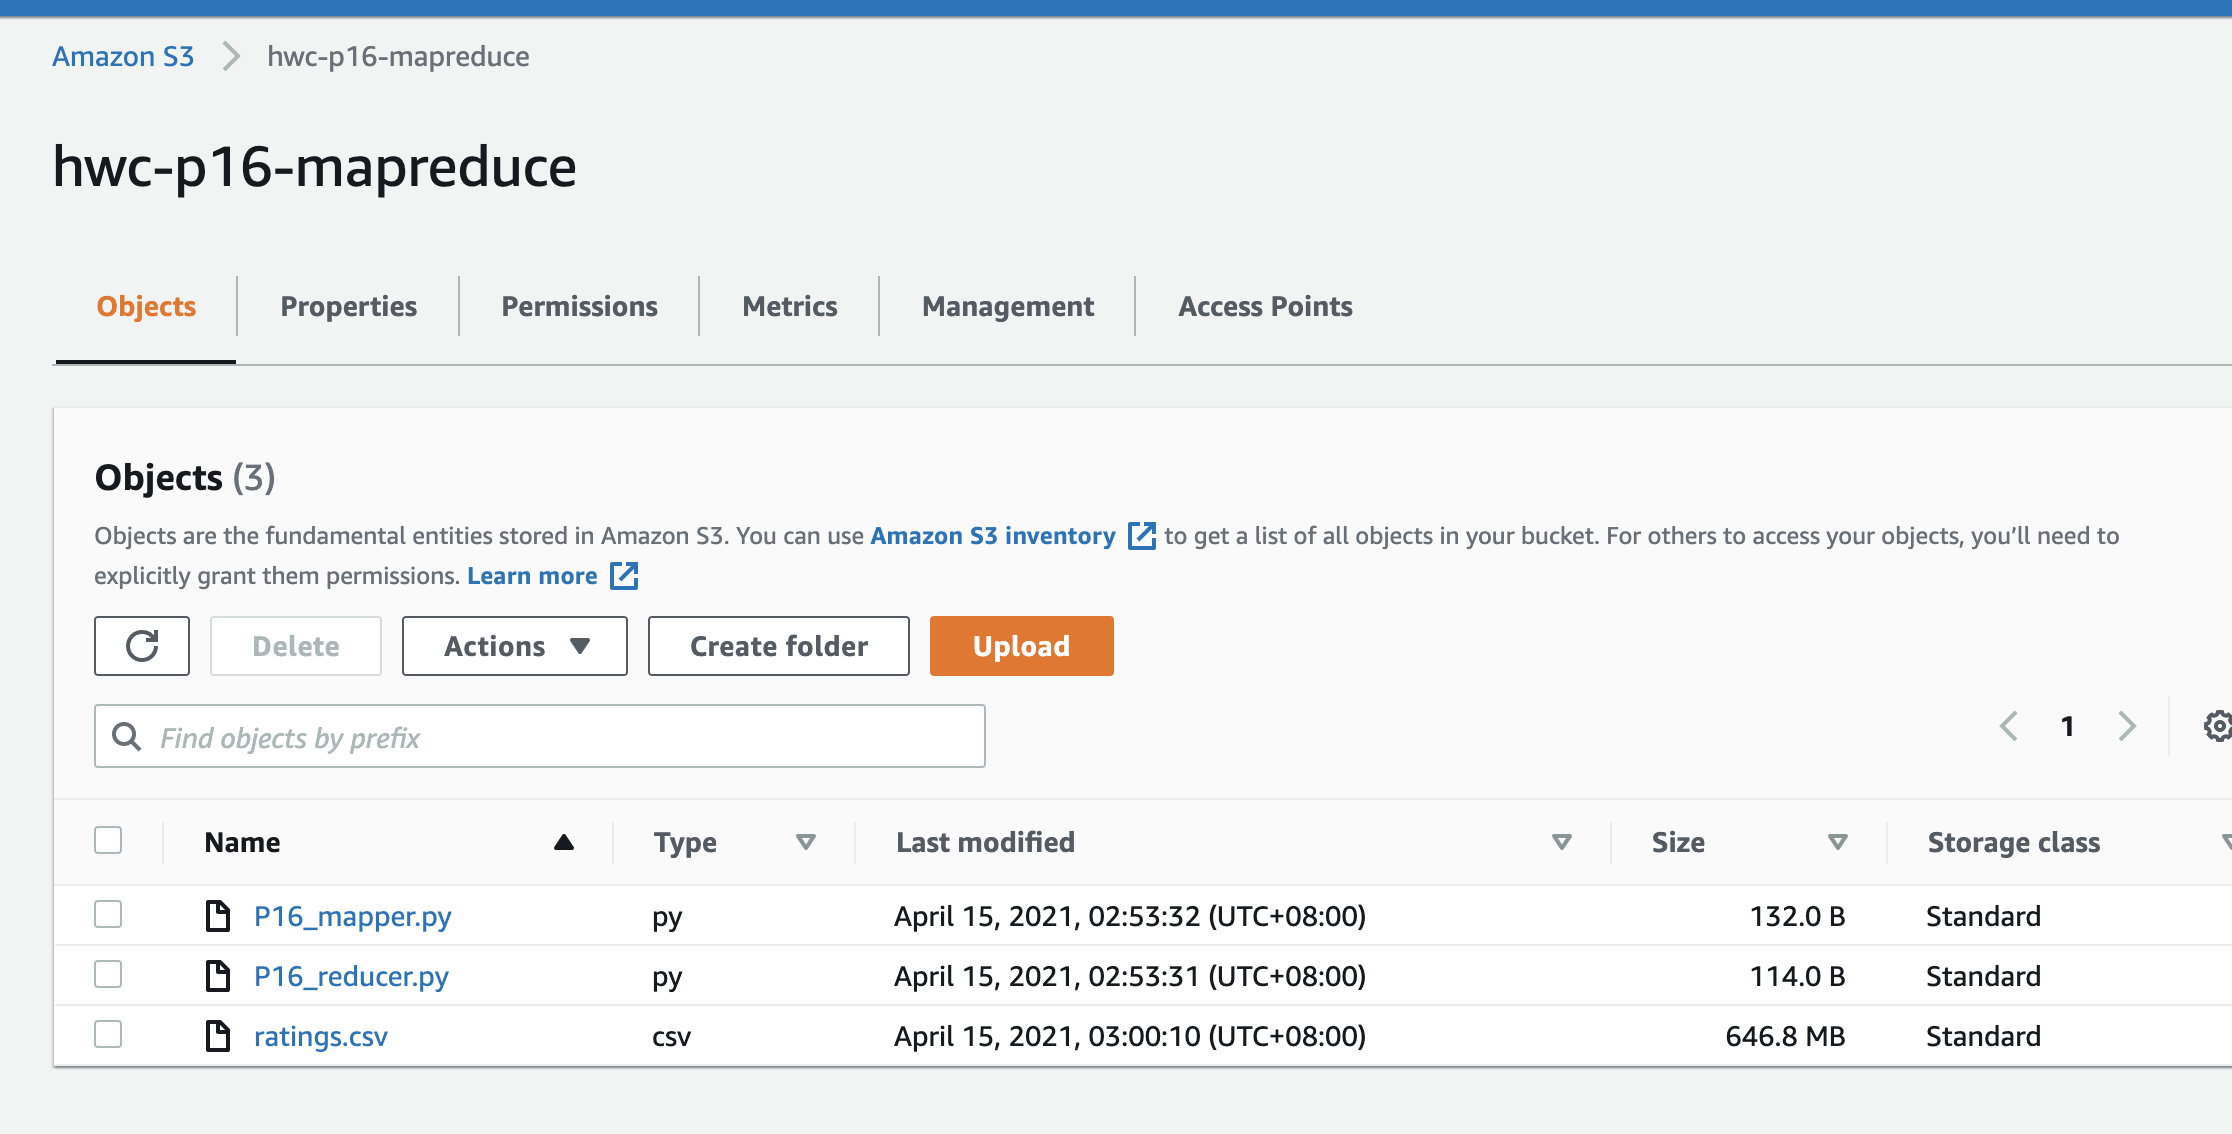

4. A screenshot for mapper and reducer (with hardcoded input argue for 5.0 ratings)
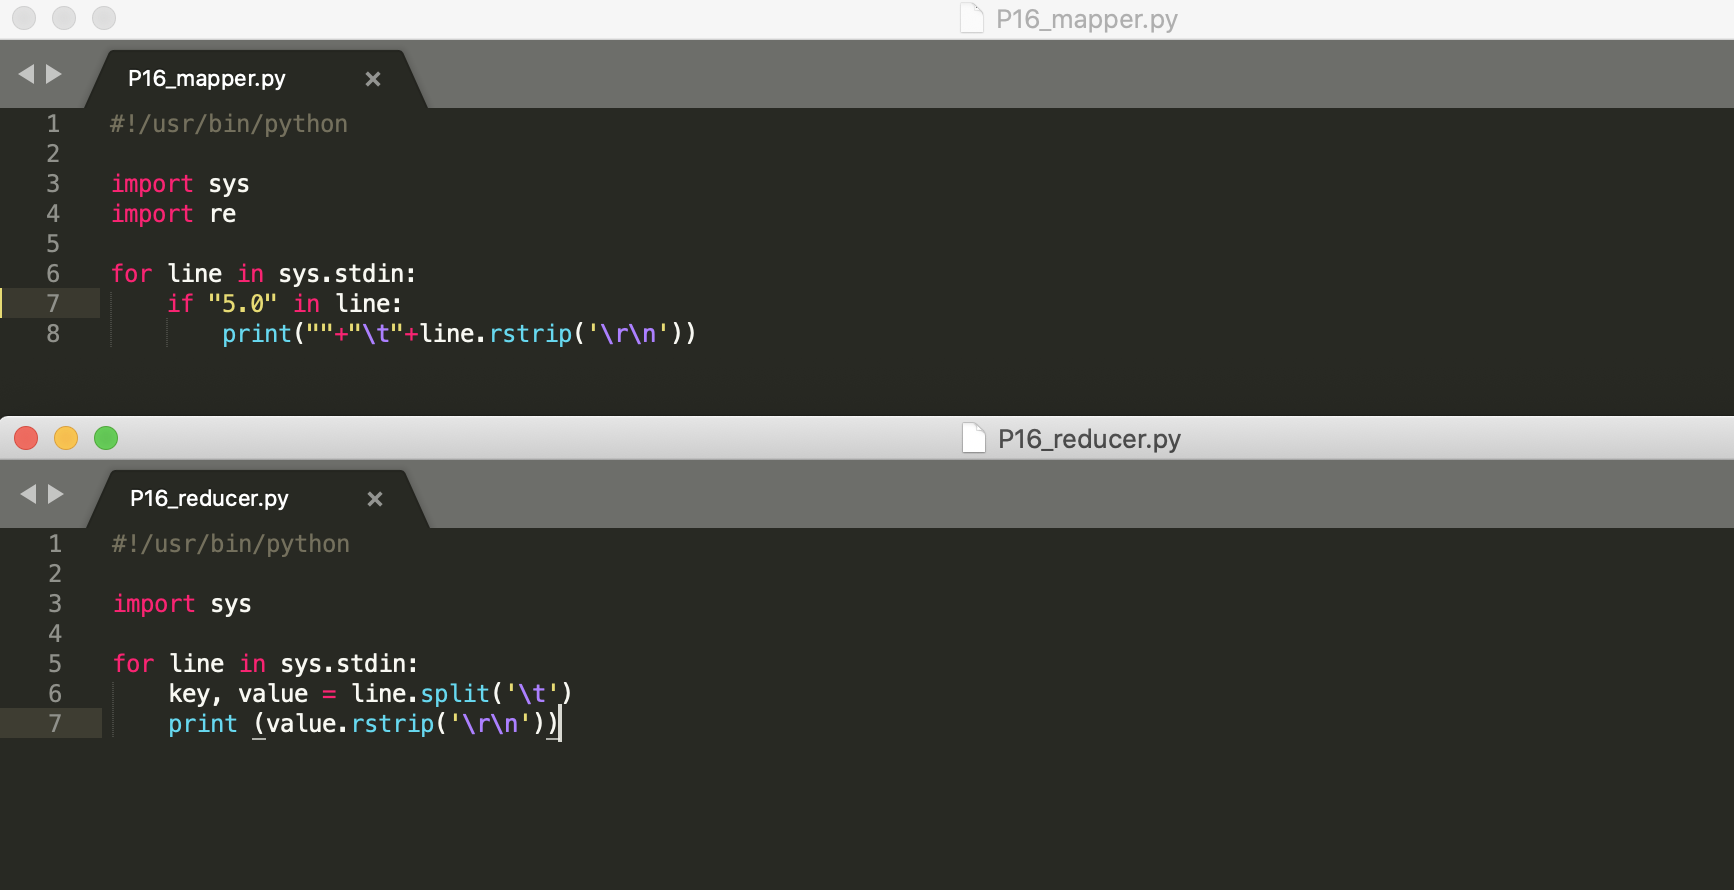

5. Go to the Hadoop cluster dashboard’s Steps tab and click on “Add Step" to create hadoop job with files in S3 bucket.

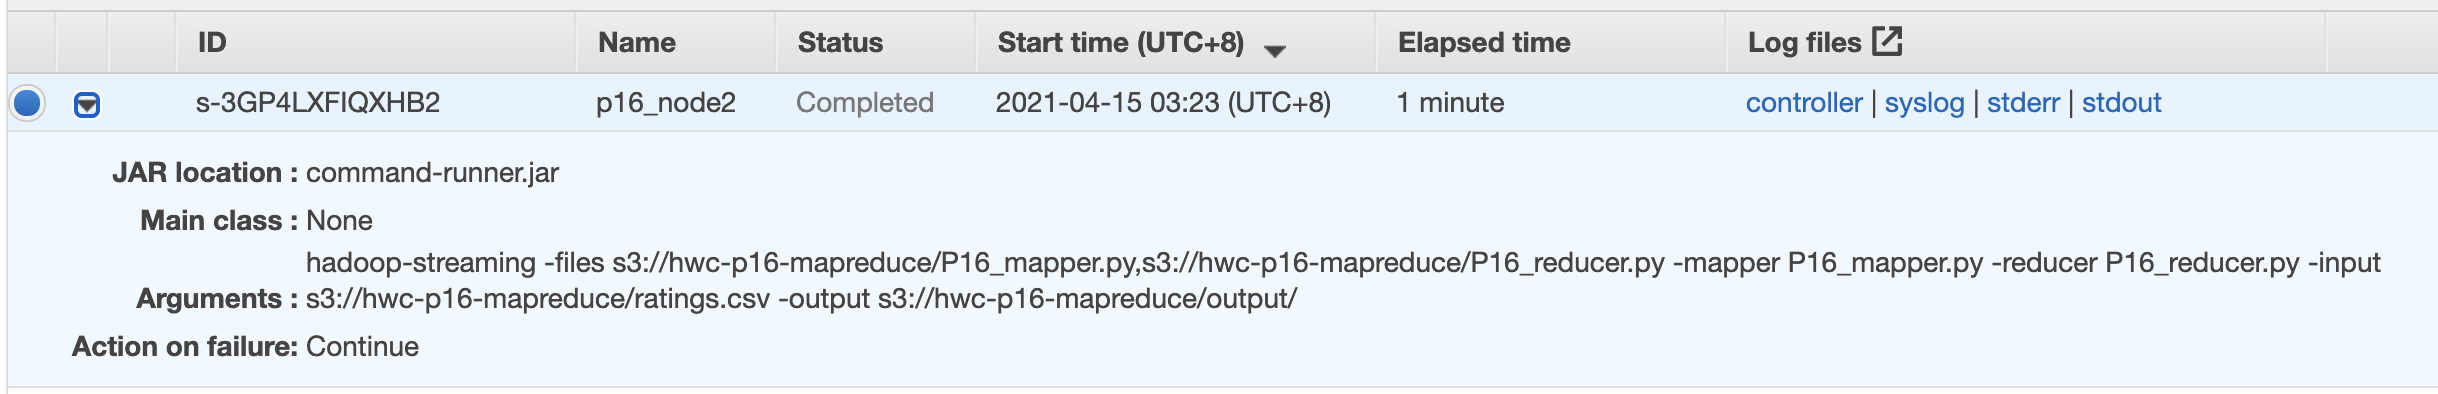

6. Controller Log for `2` core nodes (86 seconds)

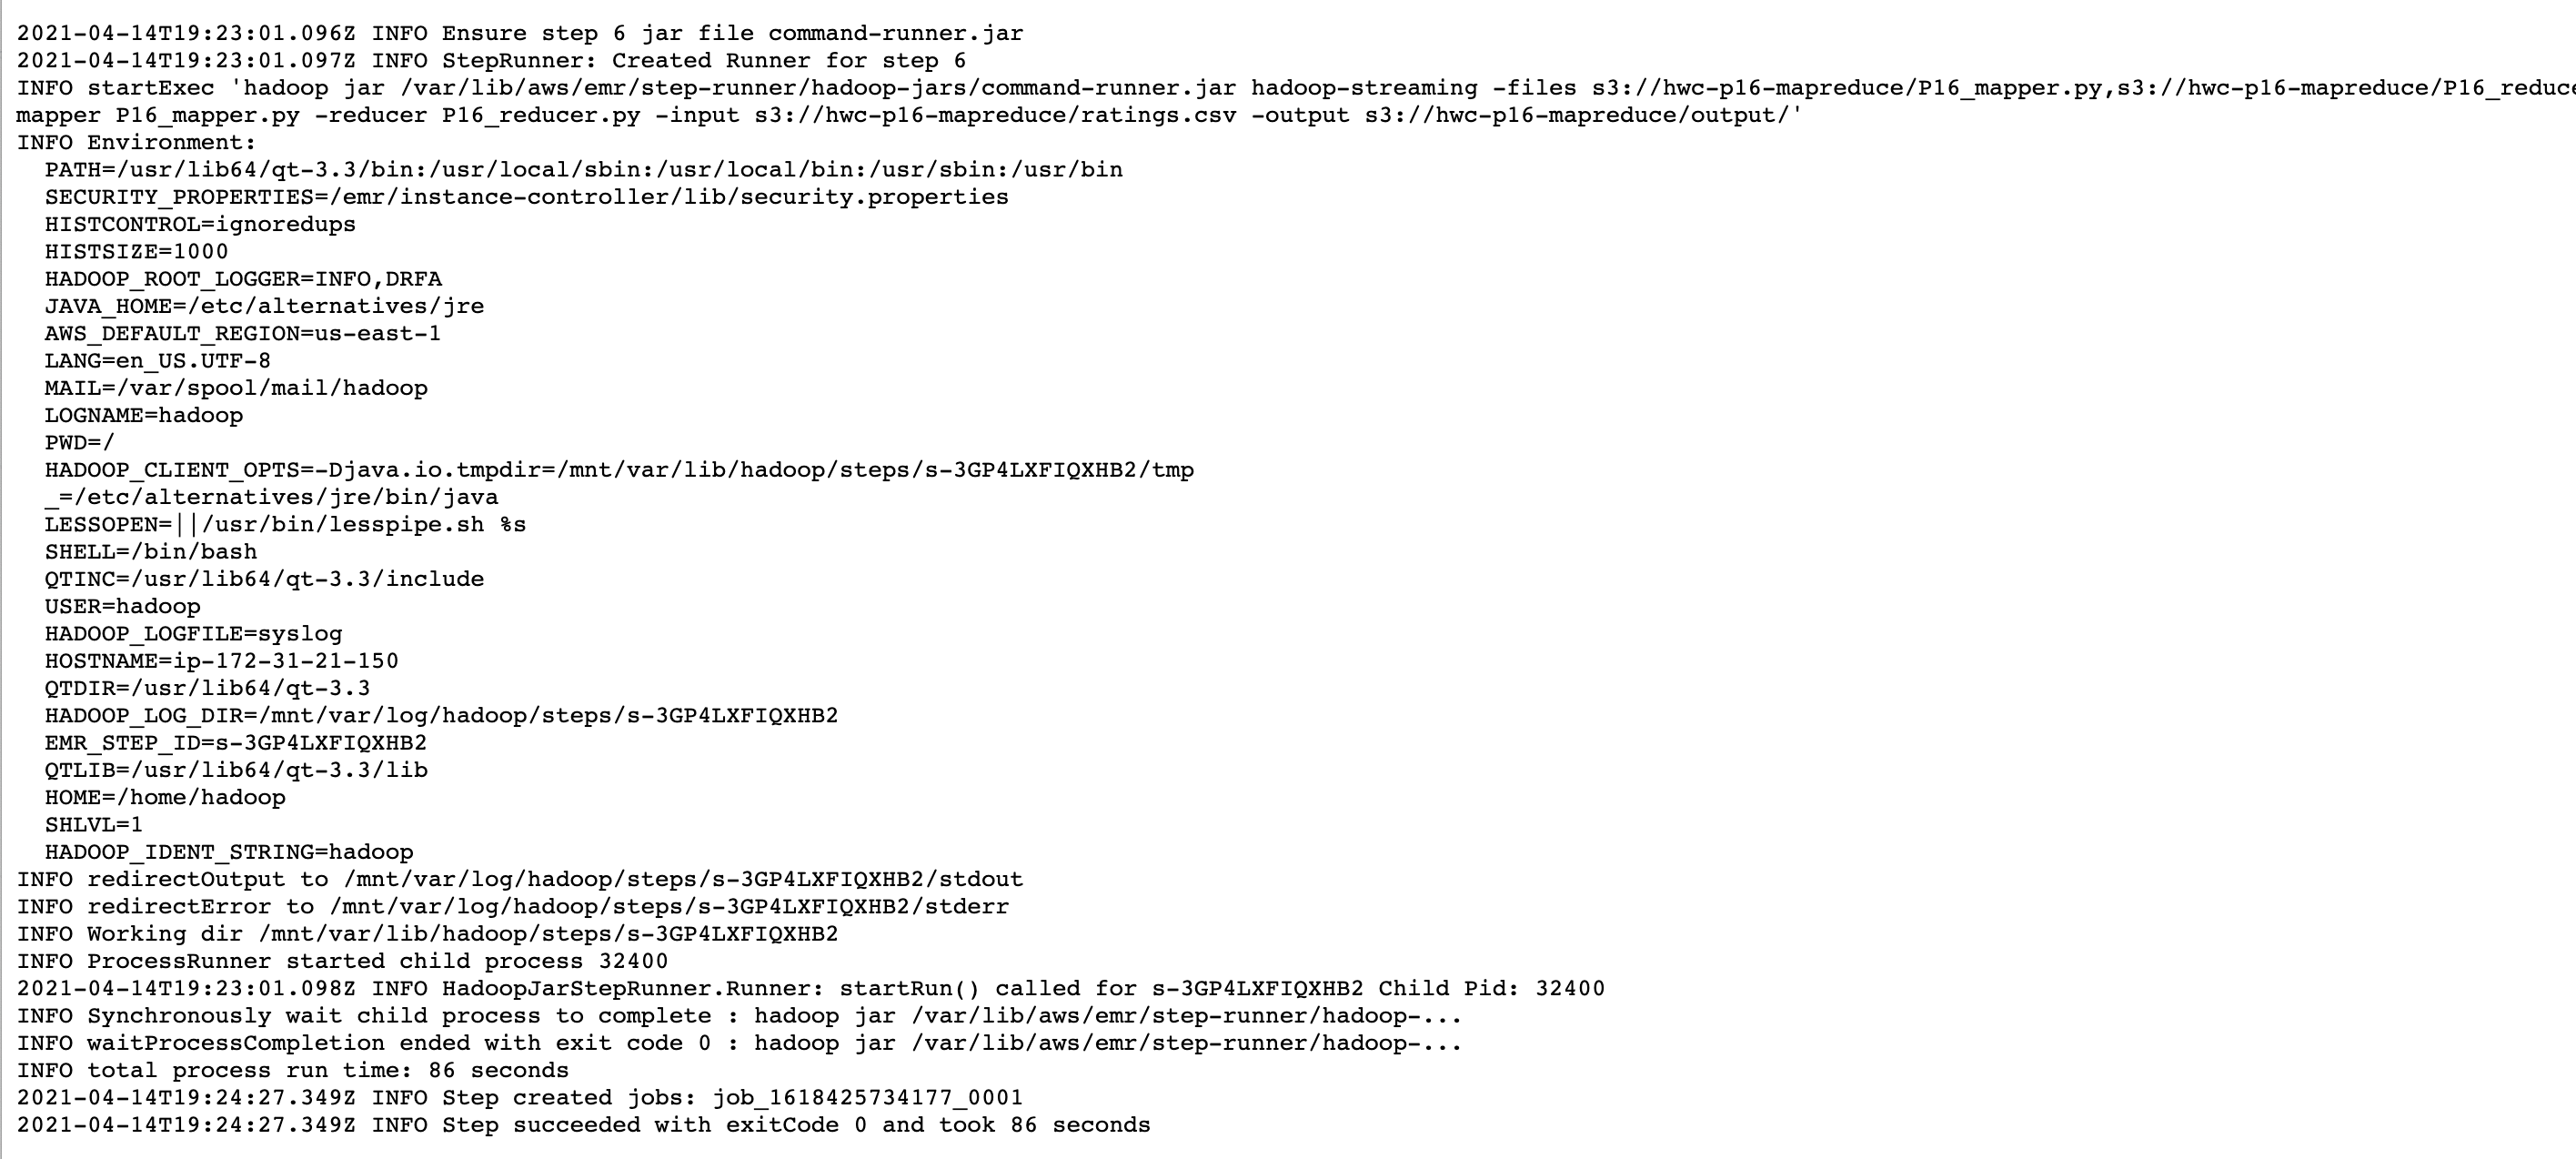

7. Taking a peek into output files in S3 bucket to confirm the output is as expected.
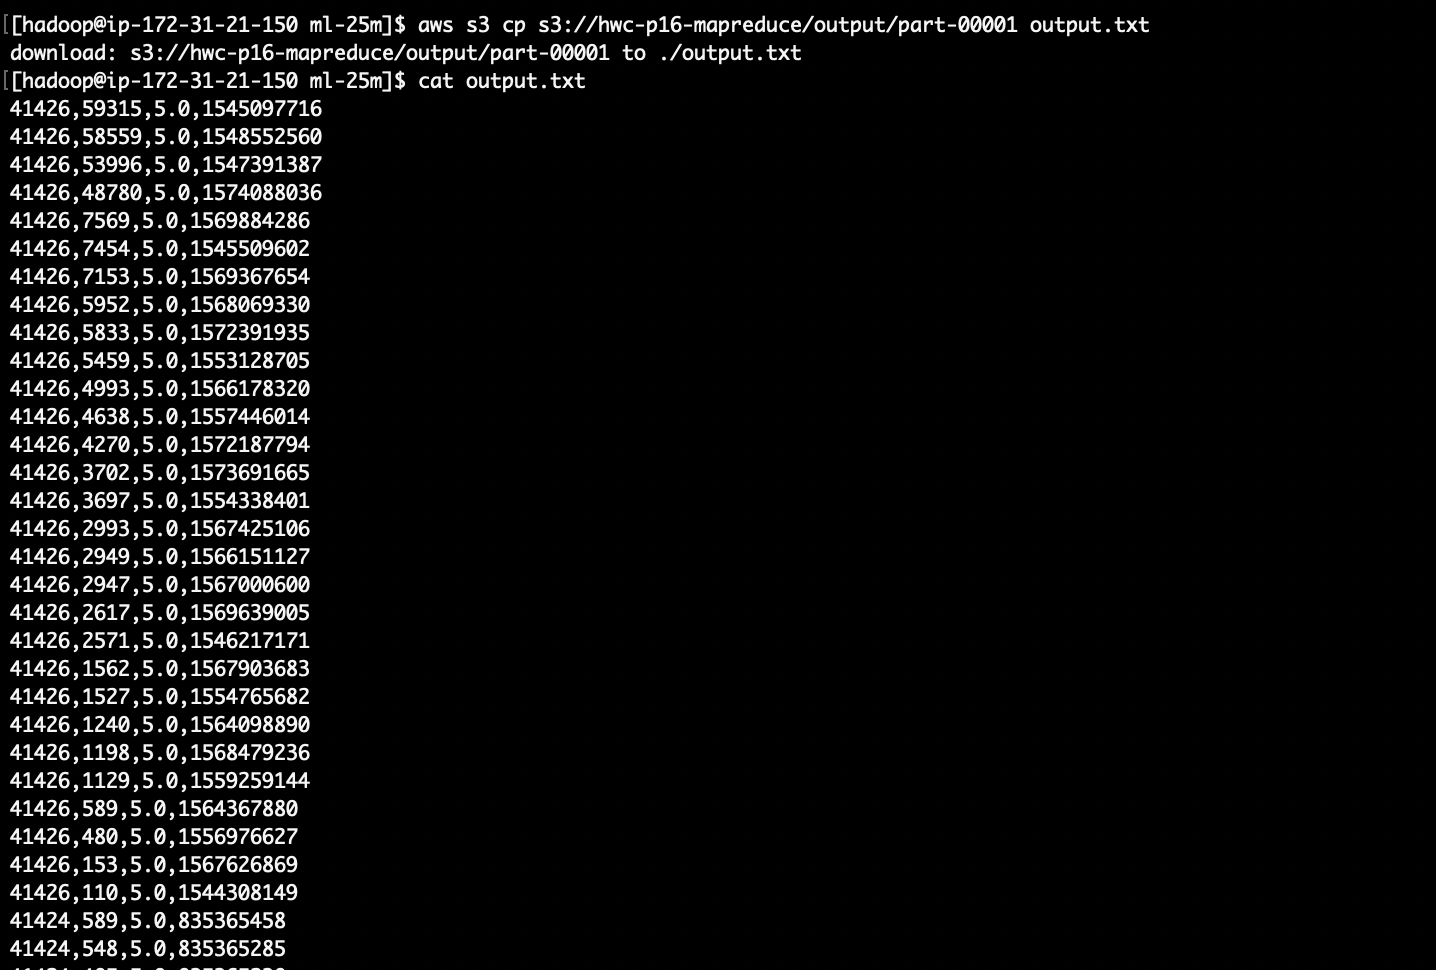

8. Resize to `4` core nodes and redo step 5-7
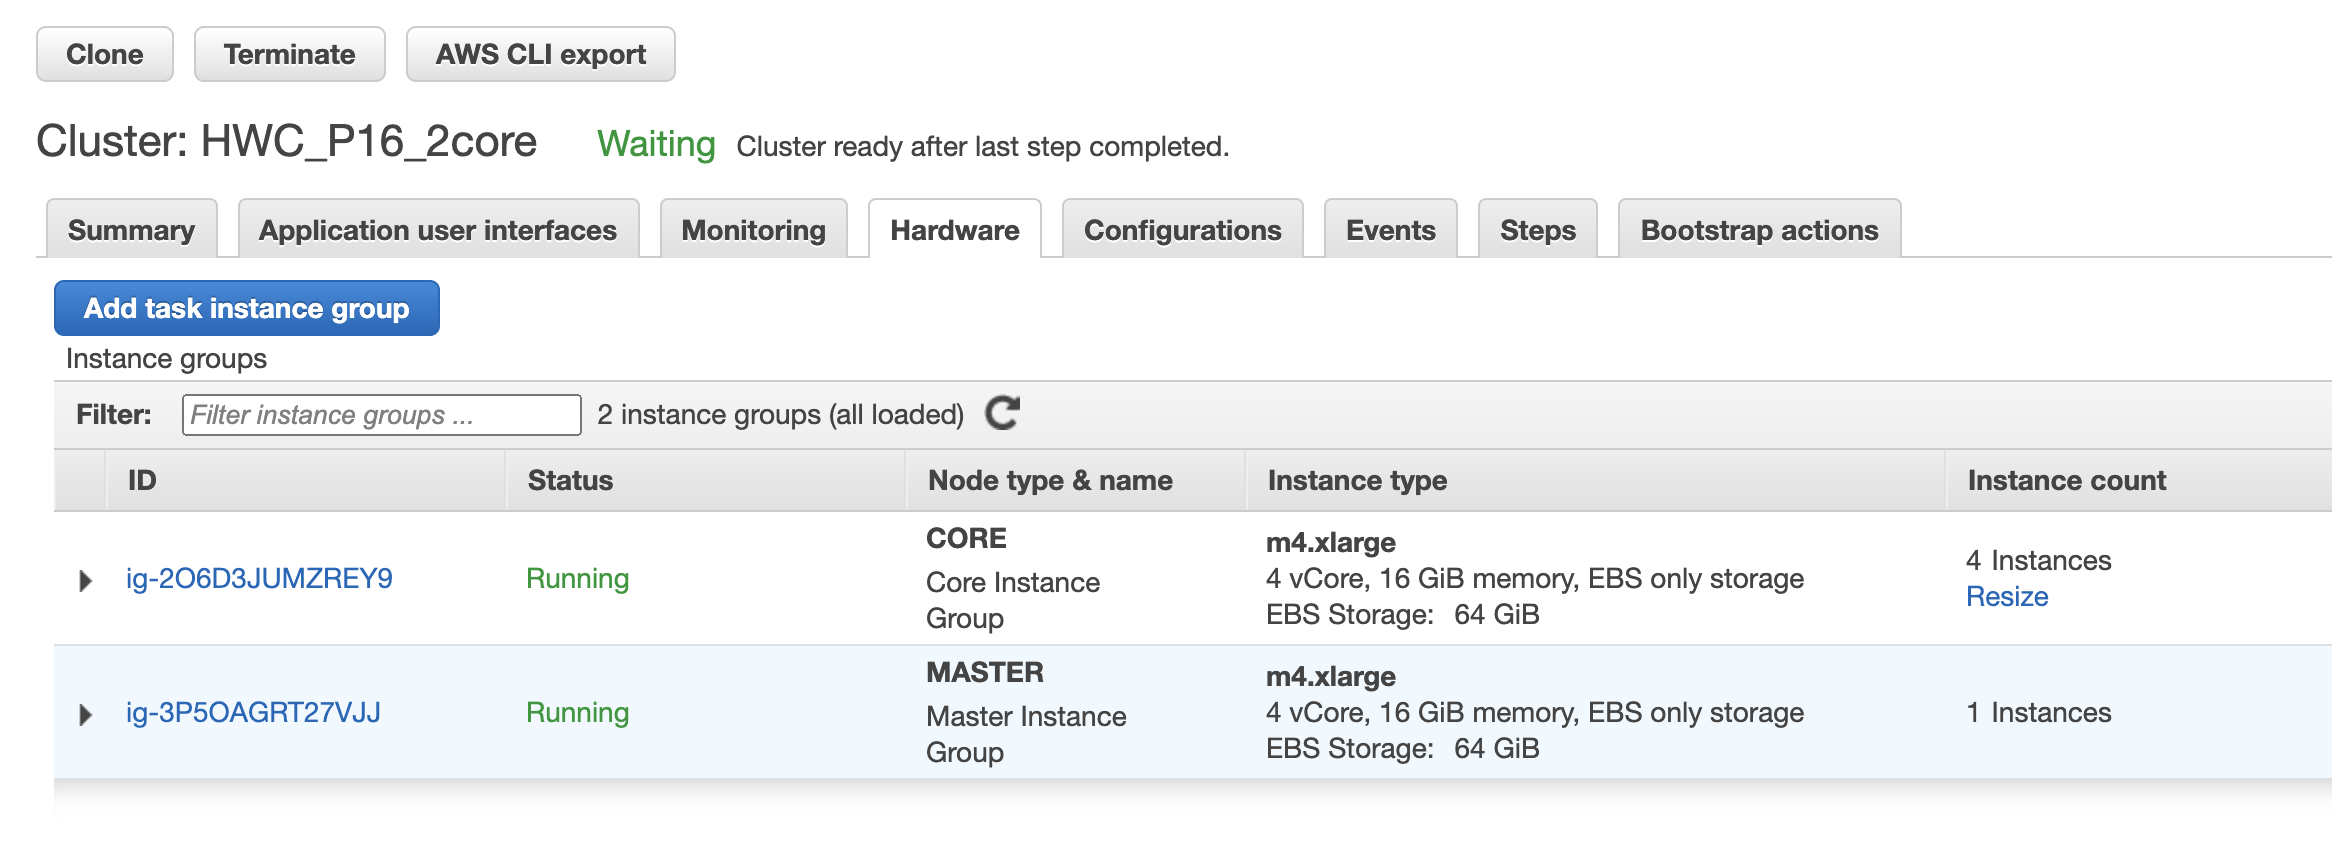

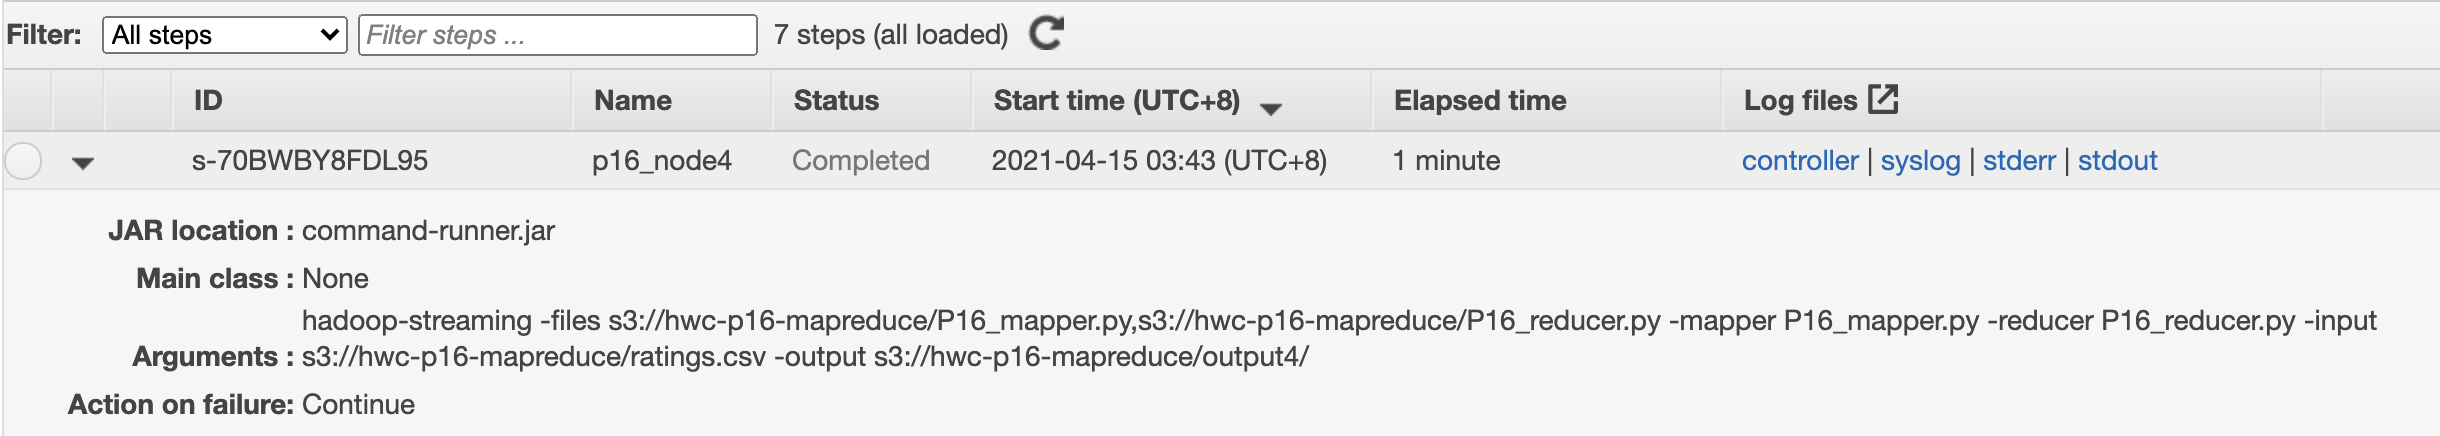

9. Controller Log for 4 core nodes (66 seconds)

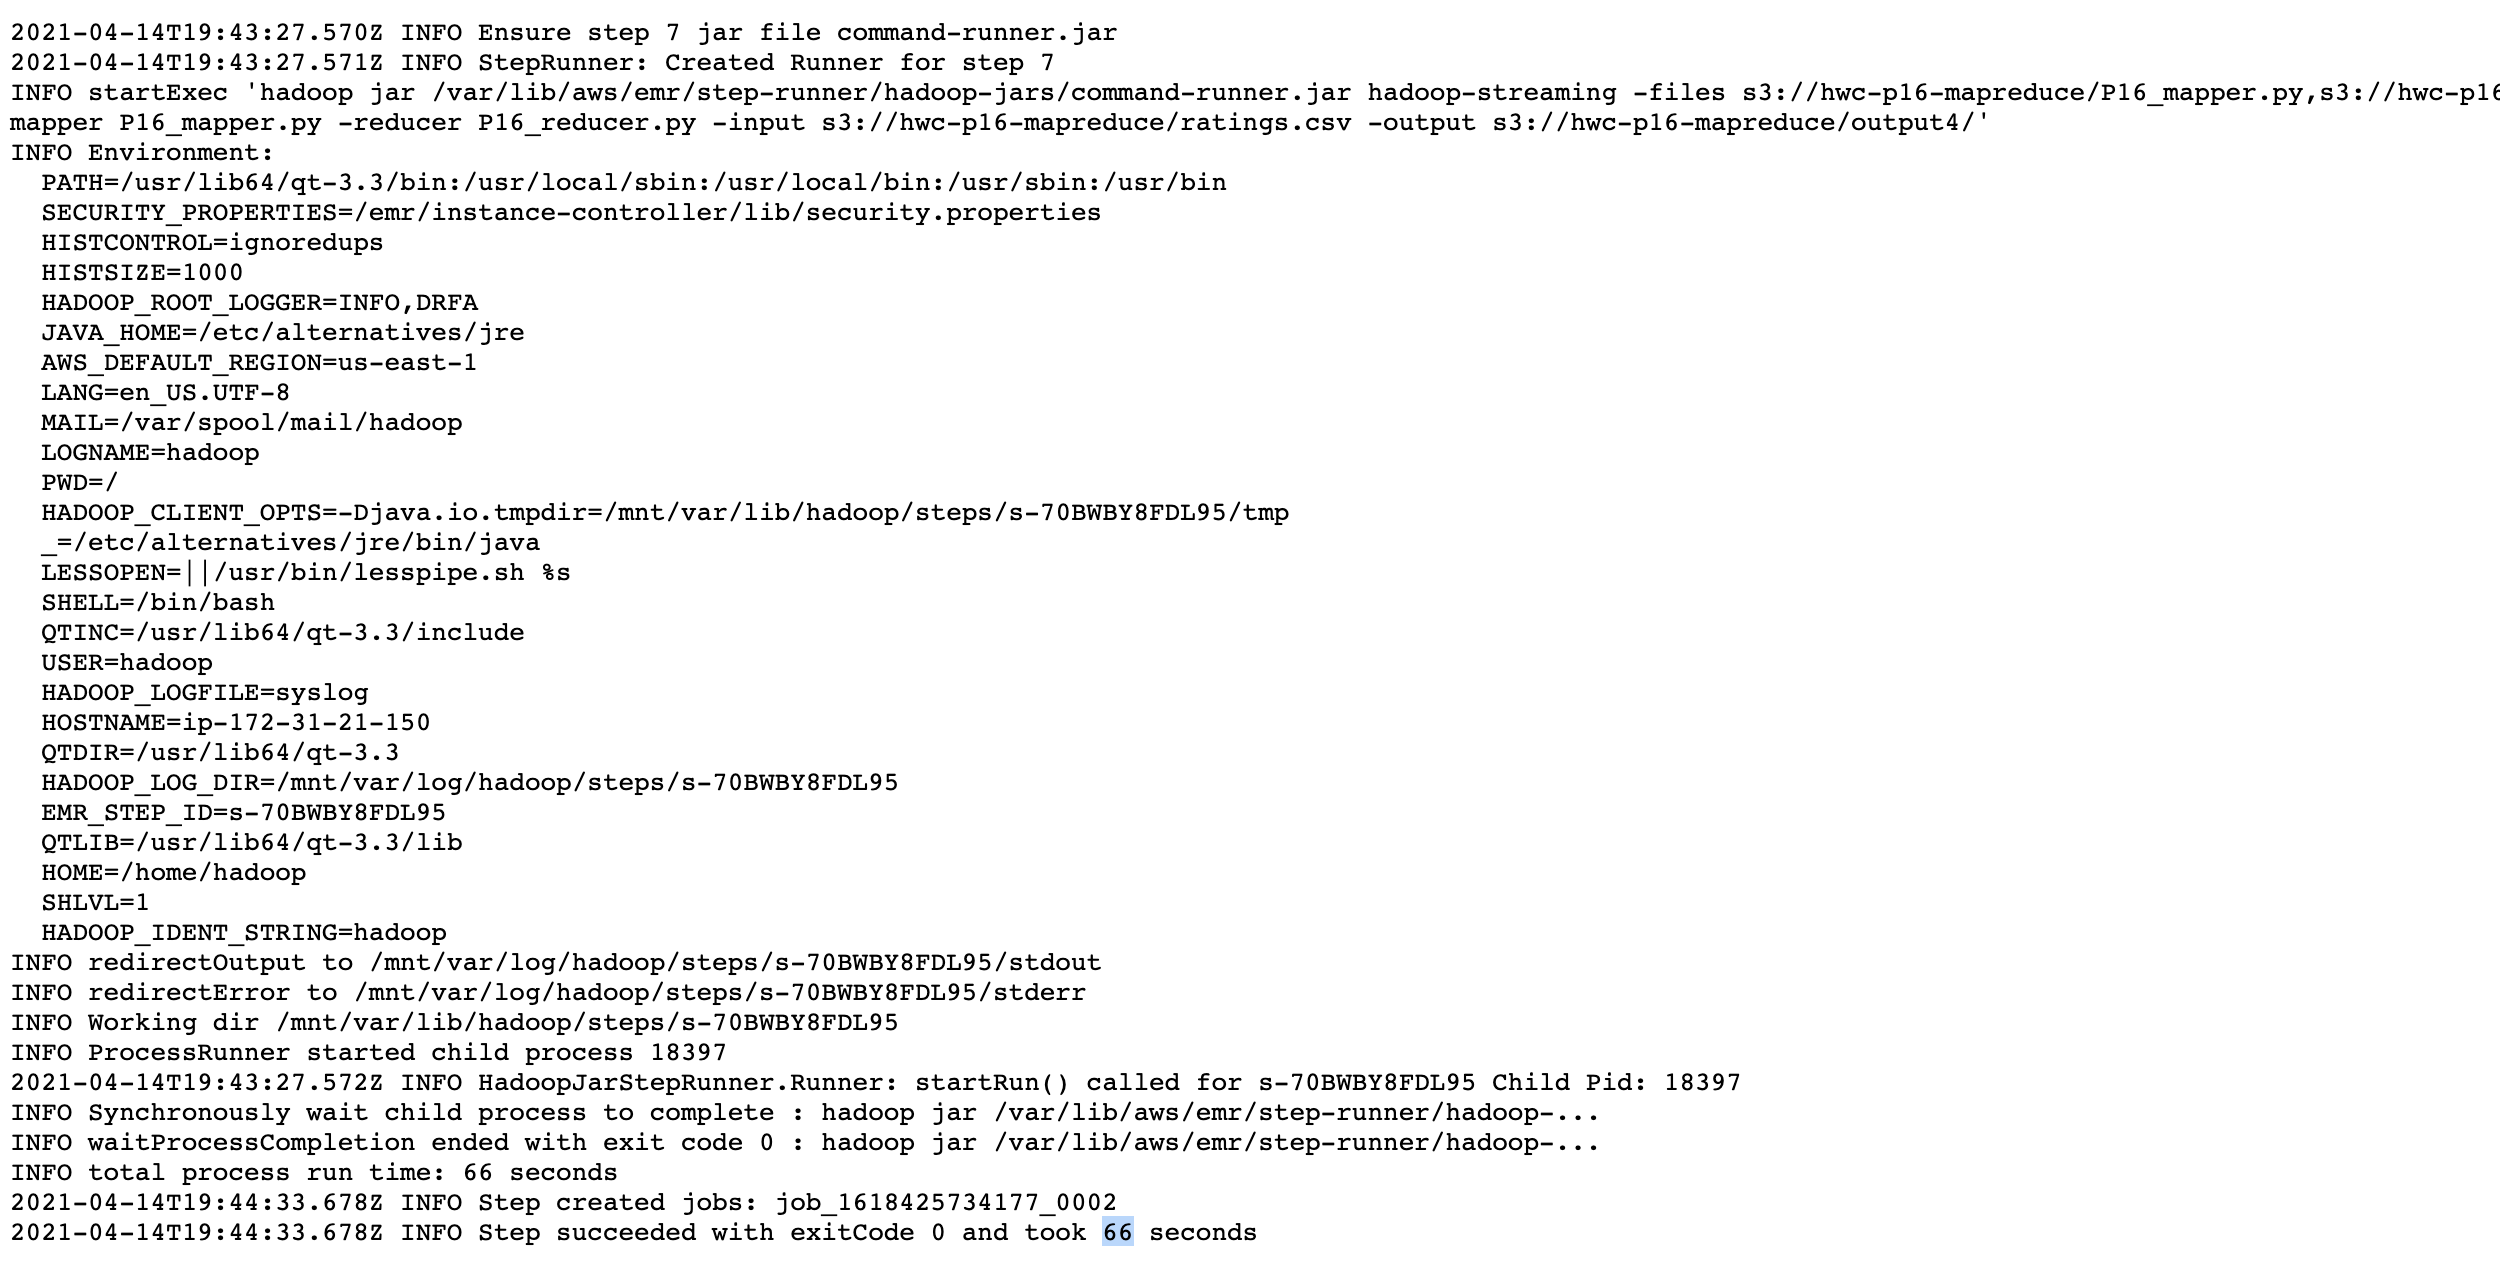

10. Resize to `8` nodes and redo step 5-7
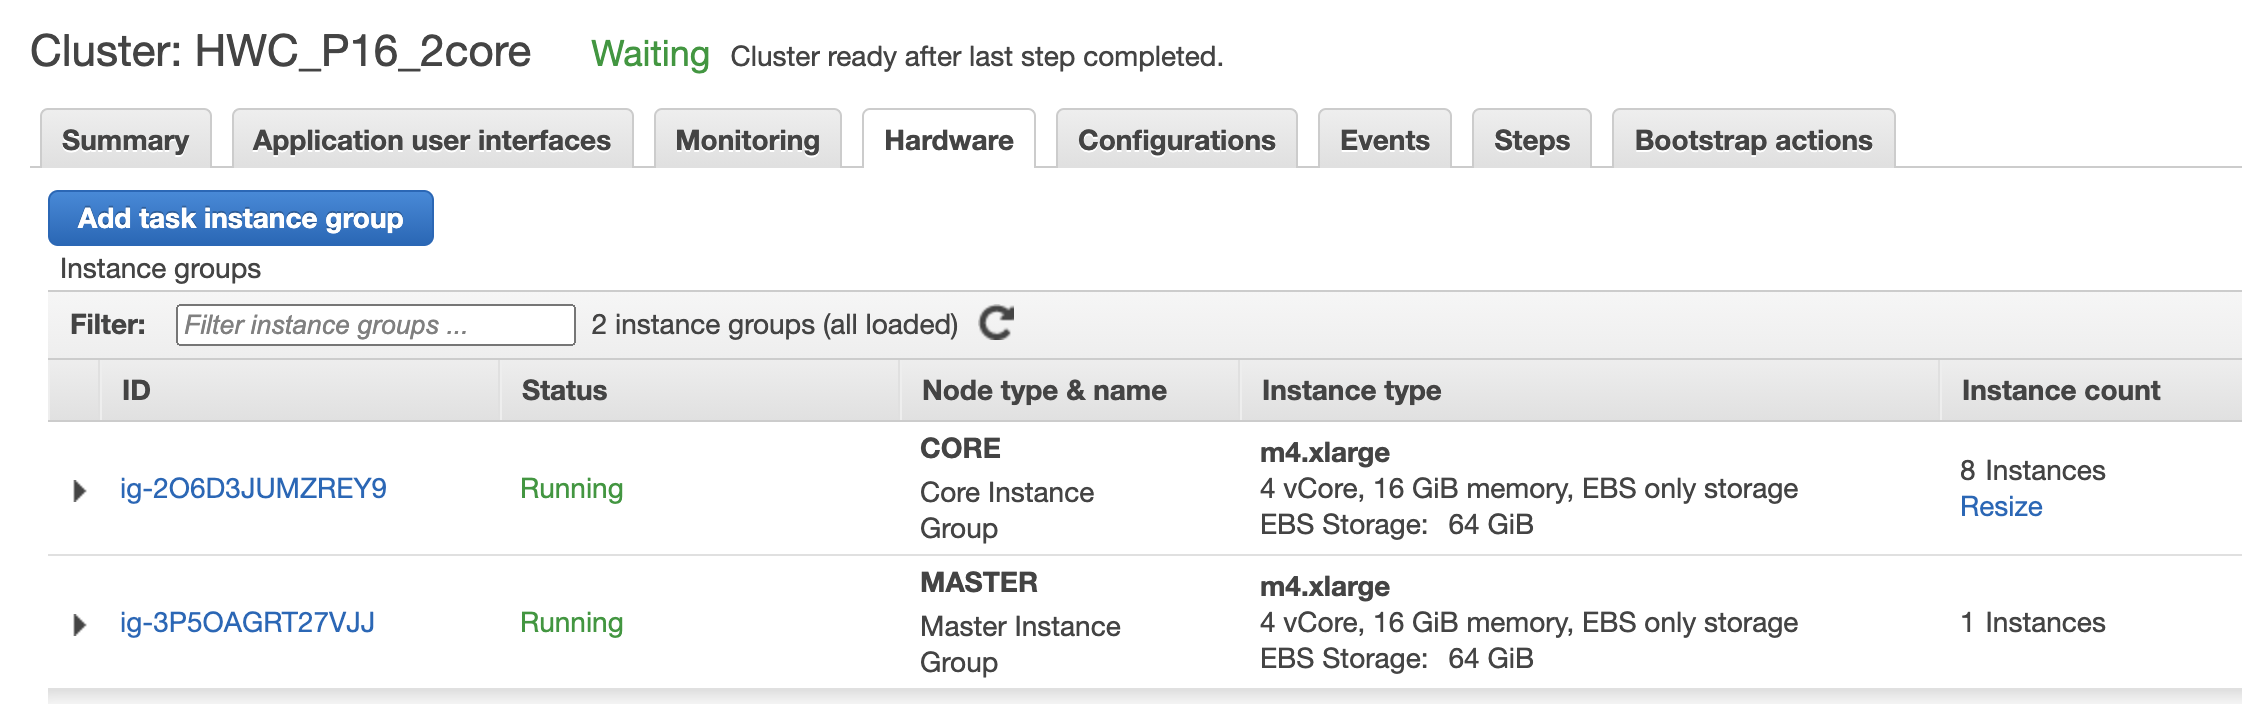
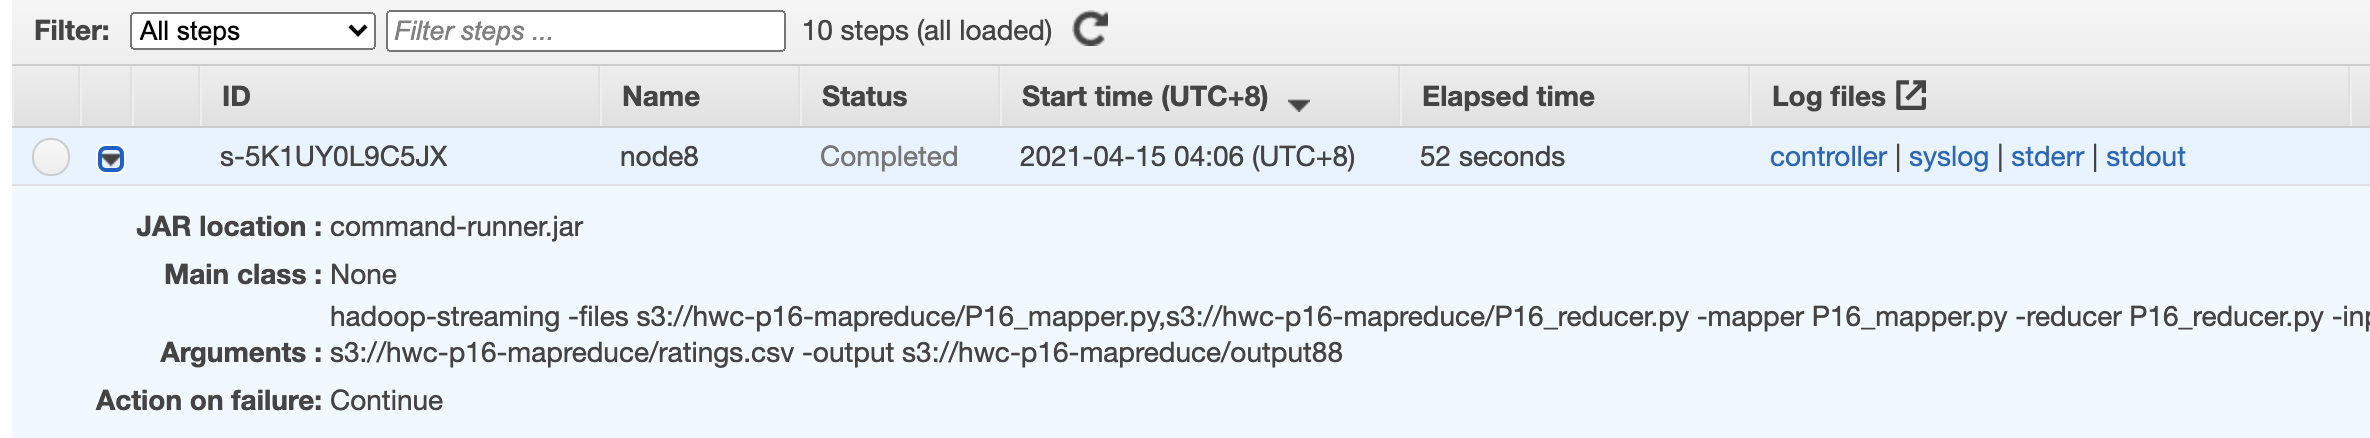

11. Controller Log for `8` core nodes (52 seconds)
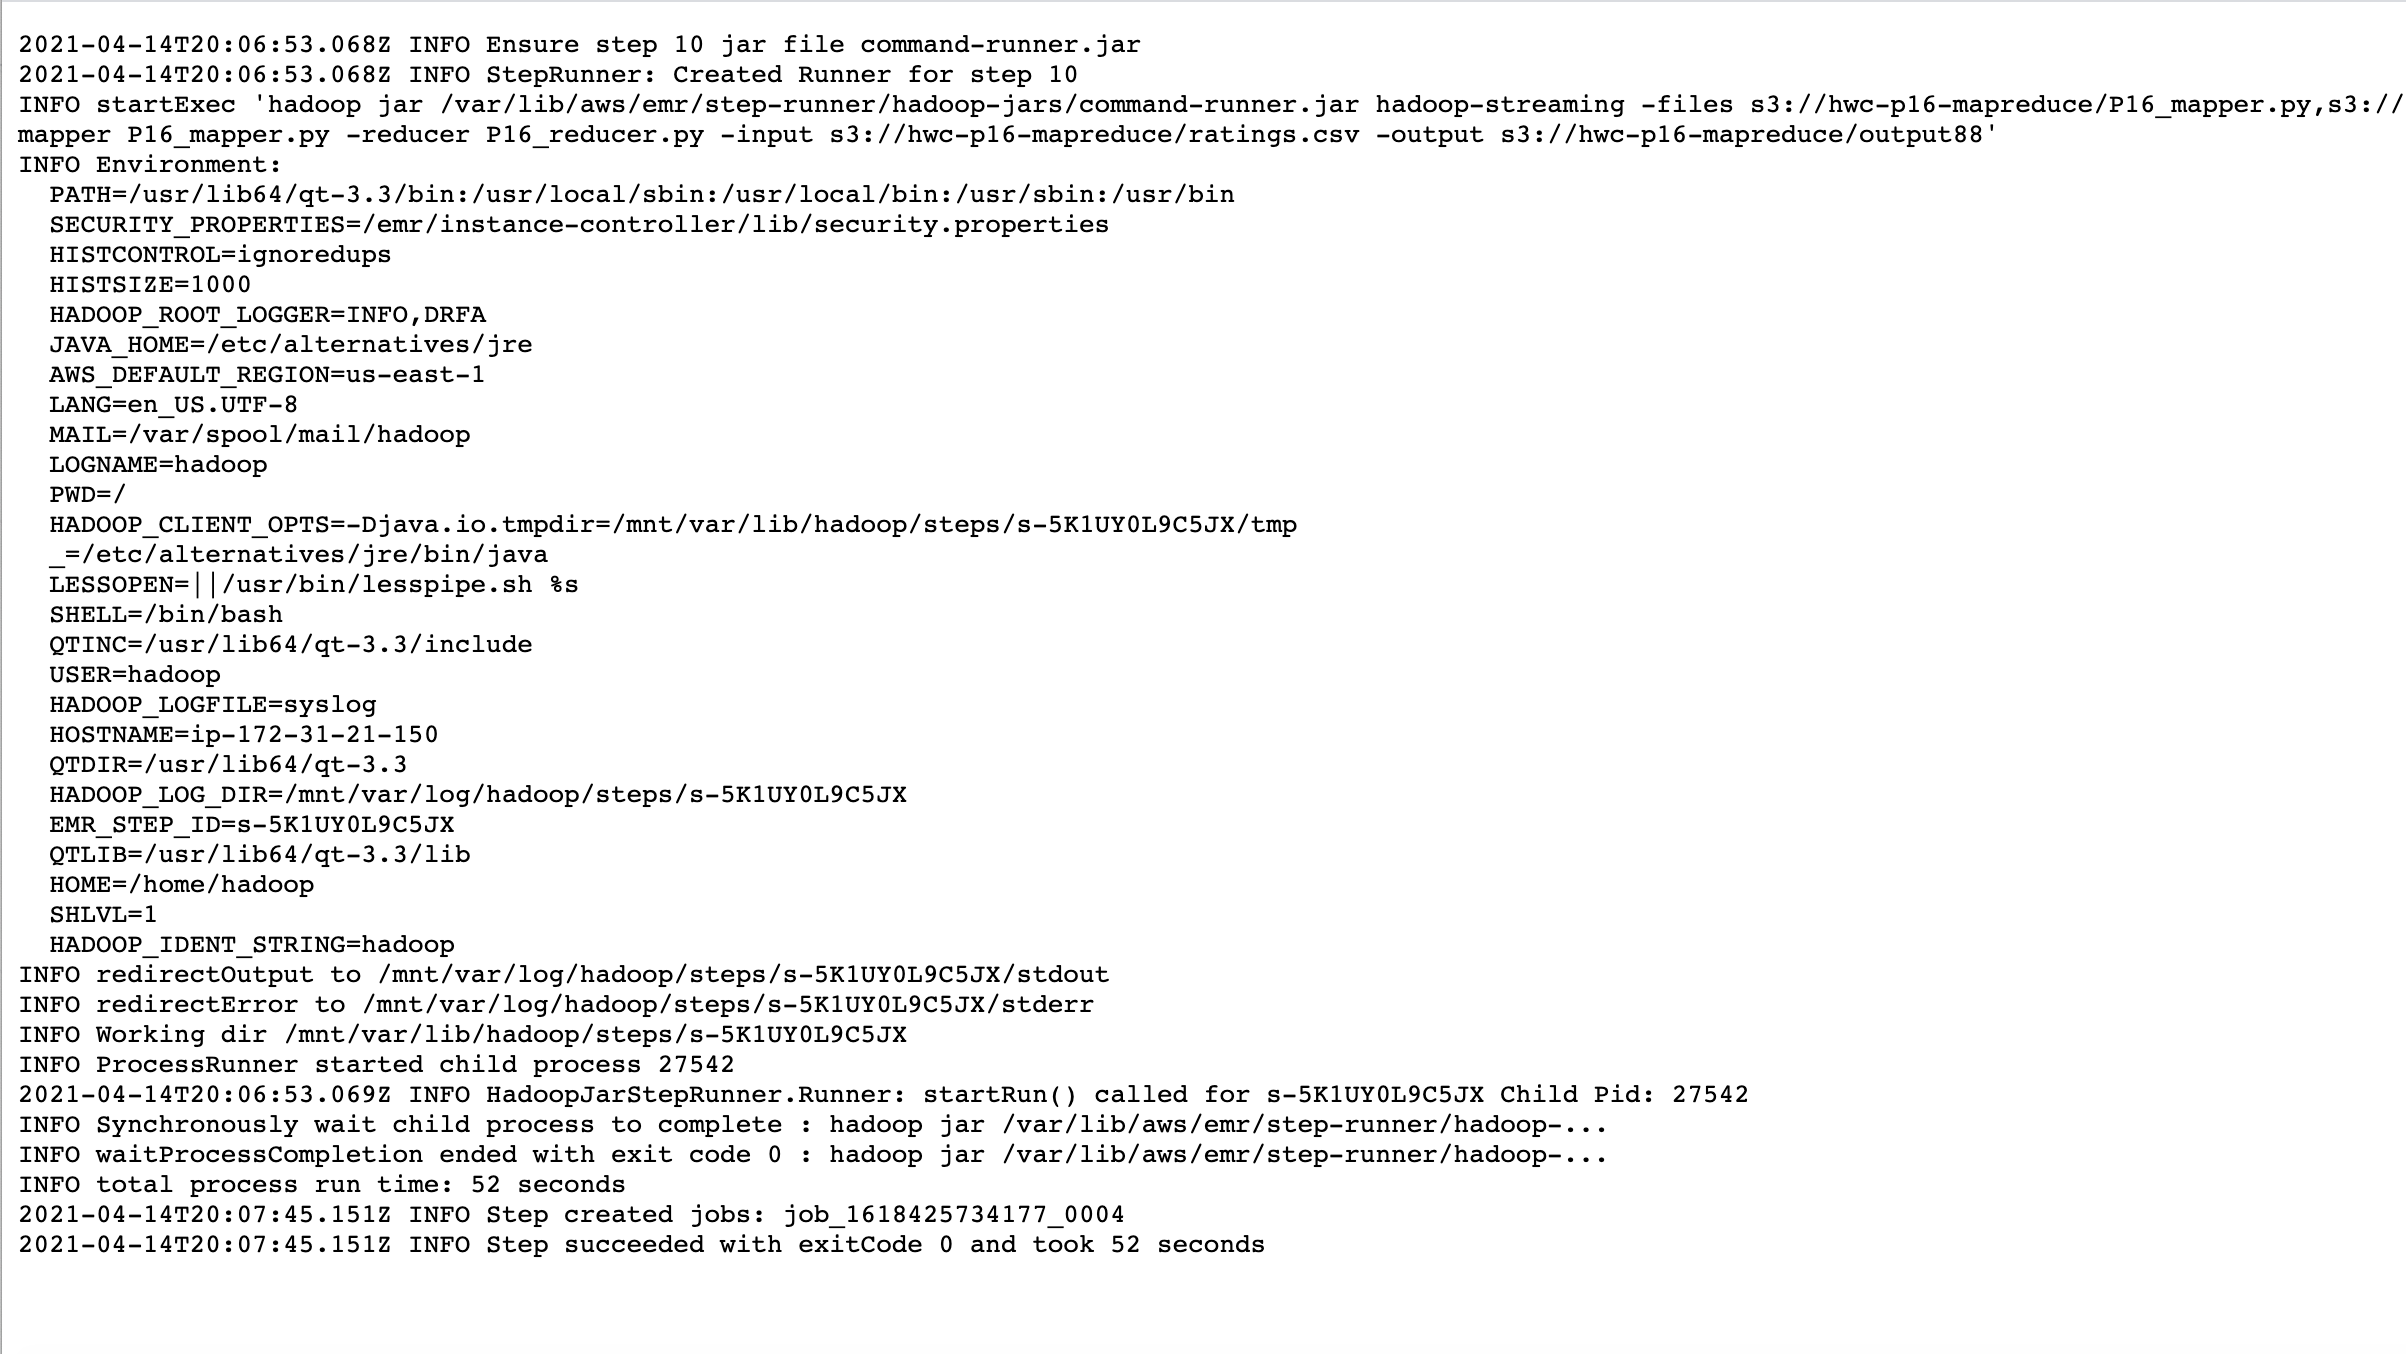